In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Datei einlesen

In [114]:
def open_file(file):
    df = pd.read_csv(file,
                    sep=";",
                    header = 0,
                    usecols=["CASE", # Nummerierung in csv Datei
                             "Q105", # Geschlecht 1=weiblich, 2=männlich, 3=anderes
                             "Q106_01", #Alter
                             "Q107", "Q107_04", # Land 1=Deutschland, 2=, 3=, 4= anderes Land
                             "Q110", "Q110_09", # Abschluss
                             "Q118_01", # Anmerkungtext
                             "Q119_01", # Code
                             "Q201_01", "Q201_02", "Q201_03", "Q201_04", "Q201_05", "Q201_06", "Q201_07", "Q201_08", "Q201_09", "Q201_10", # SUS
                             "Q301_01", "Q301_02", "Q301_03", "Q301_04", "Q301_05", "Q301_06", "Q301_07", "Q301_08", "Q301_09", "Q301_10", 
                             "Q301_11", "Q301_12", "Q301_13", "Q301_14", "Q301_15", "Q301_16", "Q301_17", "Q301_18", "Q301_19", "Q301_20", 
                             "Q301_21", "Q301_22", "Q301_23", "Q301_24", "Q301_25", "Q301_26", "Q301_27", "Q301_28", "Q301_29", "Q301_30", 
                             "Q301_31", "Q301_32", "Q301_33"], # GEQ
                    skiprows=range(1,9),
                    encoding="utf-8")

    df.to_csv("result.csv")
    df = pd.read_csv("result.csv", index_col=0)
    return df

df = open_file("main_data.csv") # Probedurchlauf
# df = open_file("main_data.csv") # zweiter Durchlauf
teilnehmende = len(df)

df

,CASE,Q105,Q106_01,Q107,Q107_04,Q110,Q110_09,Q118_01,Q119_01,Q201_01,...,Q301_24,Q301_25,Q301_26,Q301_27,Q301_28,Q301_29,Q301_30,Q301_31,Q301_32,Q301_33
0,22,1,23,1,NaN,7,NaN,NaN,21629,2,...,1,5,4,4,4,4,1,2,1,3
1,24,1,23,1,NaN,8,NaN,NaN,94273,4,...,1,4,3,4,4,1,2,2,1,1
2,26,1,28,1,NaN,4,NaN,Ein lvl war für lichtempfindliche leute zu hel...,18699,4,...,2,4,4,4,5,2,4,2,2,4
3,28,2,28,1,NaN,4,NaN,Konnte das spiel nicht beenden denke aber das ...,53475,3,...,2,4,4,3,3,2,3,2,1,2
4,30,2,26,1,NaN,7,NaN,Fragen wirken sehr allgemein und man muss inte...,61462,1,...,2,1,3,3,4,2,2,1,1,1
5,33,2,29,1,NaN,8,NaN,Ja die Fragen waren mir manchmal nicht ganz kl...,38174,2,...,1,4,5,3,4,3,4,3,2,3
6,34,2,20,1,NaN,4,NaN,"Attaksie im Rechten Arm,",81228,3,...,3,3,5,2,4,3,3,1,1,5
7,36,2,25,1,NaN,7,NaN,"Doppelte Fragen, teilweise nicht präzise genug...",'01559,1,...,1,1,1,1,5,1,1,1,1,1
8,38,2,23,1,NaN,8,NaN,NaN,'05531,1,...,1,1,3,2,2,2,2,1,3,2


In [115]:
print(f"\nA total of {teilnehmende} people took part in the survey.")


A total of 9 people took part in the survey.


# Demographics
## Geschlecht

In [116]:
df_gender = df[["Q105"]].astype(str).copy()

geschlechter = ["female", "male", "non-binary"]
antworten = ["1","2","3"]
counter_antworten = np.zeros(len(antworten))

for i in range(len(antworten)):
    df_antworten = df_gender.loc[df_gender["Q105"].str.contains(antworten[i].lower(), case=False, regex=False)==True]
    counter_antworten[i] = len(df_antworten)
print("Häufigkeiten:")
liste = list(zip(counter_antworten, antworten, geschlechter))
for i in range(len(liste)):
    print(liste[i])



Häufigkeiten:
(3.0, '1', 'female')
(6.0, '2', 'male')
(0.0, '3', 'non-binary')


## Alter

Alter-Durchschnitt: 25.0 Jahre
Standardabeichung: 2.83 Jahre
Älteste Person: 29 Jahre
Jüngste Person: 20 Jahre
Median-Alter: 25.0
Der Modus beträgt: 23 Jahre mit einer Häufigkeit von 3.


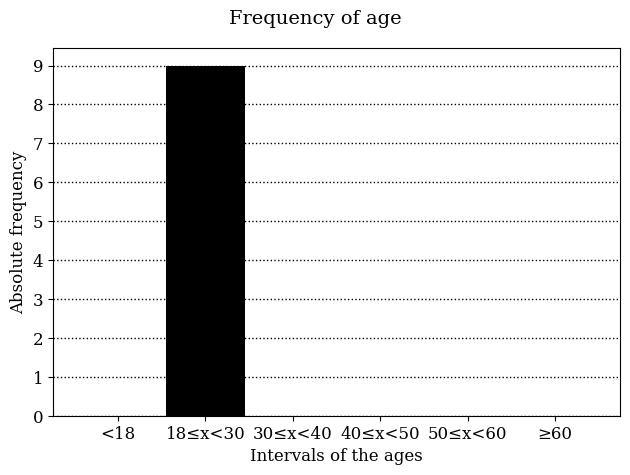

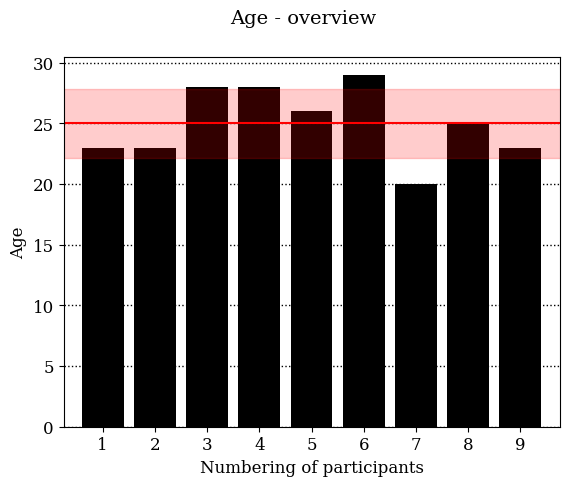

In [117]:
df_age = df[["Q106_01"]].copy()

age_values = df_age[["Q106_01"]].values.ravel() # Array mit Alter-Antworten

arr = []
for i in range(len(age_values)):
    if not pd.isna(age_values[i]):
        arr.append(int(age_values[i]))

mean = np.mean(arr)
std = np.std(arr)
        
print(f"Alter-Durchschnitt: {round(mean,2)} Jahre\nStandardabeichung: {round(std,2)} Jahre")
print(f"Älteste Person: {round(np.max(arr),2)} Jahre\nJüngste Person: {round(np.min(arr),2)} Jahre")
print(f"Median-Alter: {np.median(arr)}")
print(f"Der Modus beträgt: {stats.mode(arr)[0]} Jahre mit einer Häufigkeit von {stats.mode(arr)[1]}.")

x = ["<18", "18≤x<30", "30≤x<40", "40≤x<50", "50≤x<60", "≥60"]
age_interval = [0,0,0,0,0,0]
for i in range(len(arr)):
    if arr[i] < 18:
        age_interval[0] += 1
    if arr[i] >= 18 and arr[i] < 30:
        age_interval[1] += 1
    if arr[i] >= 30 and arr[i] < 40:
        age_interval[2] += 1
    if arr[i] >= 40 and arr[i] < 50:
        age_interval[3] += 1
    if arr[i] >= 50 and arr[i] < 60:
        age_interval[4] += 1
    if arr[i] >= 60:
        age_interval[5] += 1

fig_age, ax_age = plt.subplots()
fig_age.suptitle("Frequency of age", fontsize=14, fontname="serif")
ax_age.bar(x, age_interval, linestyle="None", color="black", width=0.9)

ax_age.set_xlabel("Intervals of the ages", fontsize=12, fontname="serif")
ax_age.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(age_interval)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
plt.tight_layout()


fig_age.savefig("figures/age_frequency.png")

plt.show()


fig_age2, ax_age2 = plt.subplots()
x = []
for i in range(1,len(arr)+1):
    x.append(i)
ax_age2.bar(x, arr, color="black")
length_x = len(x)
x.insert(0,0)
x.append(len(x))
ax_age2.fill_between(x, mean-std, mean+std, alpha = 0.2, color="red")

fig_age2.suptitle("Age - overview", fontsize=14, fontname="serif")
ax_age2.set_xlabel("Numbering of participants", fontsize=12, fontname="serif")
ax_age2.set_ylabel("Age", fontsize=12, fontname="serif")
plt.xticks(np.arange(1, len(x), 1.0), fontsize=12, fontname="serif")
plt.yticks(fontsize=12, fontname="serif")
plt.xlim(0.25, length_x+0.75)
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.axhline(np.nanmean(arr), color="red")

fig_age2.savefig("figures/age_overview.png")

plt.show()

In [118]:
df_land = df[["Q107", "Q107_04"]].astype(str).copy()

# print(df_land)

landnamen = df_land[["Q107_04"]].values.ravel() # Array mit "Anderes"-Antworten

print("\n\"Etwas anderes\"-Antworten:")
c = 1
for i in range(len(landnamen)):
    if not pd.isna(landnamen[i]):  # Wenn es nan ist, soll es nicht geprintet werden. Es printet trotzdem :(
        print(str(c) + " " + str(landnamen[i]))
        c += 1
print("")

land = ("Deutschland", "Österreich", "Schweiz", "Ein anderes Land")
antworten = ["1", 
             "2", 
             "3",
             "4"]
counter_antworten = np.zeros(len(antworten))

for i in range(len(antworten)):
    df_antworten = df_land.loc[df_land["Q107"].str.contains(antworten[i].lower(), case=False, regex=False)==True]
    counter_antworten[i] = len(df_antworten)
print("Häufigkeiten:")
liste = list(zip(counter_antworten, land))
for i in range(len(liste)):
    print(liste[i])



"Etwas anderes"-Antworten:
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan

Häufigkeiten:
(9.0, 'Deutschland')
(0.0, 'Österreich')
(0.0, 'Schweiz')
(0.0, 'Ein anderes Land')


In [119]:

df_abschluss = df[["Q110", "Q110_09"]].astype(str).copy()

# print(df_abschluss)

anderer_abschluss = df_abschluss[["Q110_09"]].values.ravel() # Array mit "Anderes"-Antworten

print("\n\"Etwas anderes\"-Antworten:")
c = 1
for i in range(len(anderer_abschluss)):
    if not pd.isna(anderer_abschluss[i]):  # Wenn es nan ist, soll es nicht geprintet werden. Es printet trotzdem :(
        print(str(c) + " " + str(anderer_abschluss[i]))
        c += 1
print("")

abschluss = ["Noch Schüler",
             "Schule beendet ohne Abschluss",
             "Hauptschulabschluss/Volksschulabschluss",
             "Realschulabschluss (Mittlere Reife)",
             "Fachhochschulreife (Abschluss einer Fachoberschule)",
             "Abitur, allgemeine oder fachgebundene Hochschulreife (Gymnasium)",
             "Hochschulabschluss",
             "Anderer Schulabschluss"]
antworten = ["1","2","3","4","5","6","7","8"]
counter_antworten = np.zeros(len(antworten))

for i in range(len(antworten)):
    df_antworten = df_abschluss.loc[df_abschluss["Q110"].str.contains(antworten[i].lower(), case=False, regex=False)==True]
    counter_antworten[i] = len(df_antworten)
print("Häufigkeiten:")
liste = list(zip(counter_antworten, abschluss))
for i in range(len(liste)):
    print(liste[i])



"Etwas anderes"-Antworten:
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan

Häufigkeiten:
(0.0, 'Noch Schüler')
(0.0, 'Schule beendet ohne Abschluss')
(0.0, 'Hauptschulabschluss/Volksschulabschluss')
(3.0, 'Realschulabschluss (Mittlere Reife)')
(0.0, 'Fachhochschulreife (Abschluss einer Fachoberschule)')
(0.0, 'Abitur, allgemeine oder fachgebundene Hochschulreife (Gymnasium)')
(3.0, 'Hochschulabschluss')
(3.0, 'Anderer Schulabschluss')


# Anmerkungen

In [120]:
df_anmerkungen = df[["Q118_01"]].astype(str).copy()

# print(df_abschluss)

anmerkungen = df_anmerkungen[["Q118_01"]].values.ravel() # Array mit "Anderes"-Antworten

print("\n\"Anmerkungen\"-Antworten:")
c = 1
for i in range(len(anmerkungen)):
    if not pd.isna(anmerkungen[i]):  # Wenn es nan ist, soll es nicht geprintet werden. Es printet trotzdem :(
        print(str(c) + " " + str(anmerkungen[i]))
        c += 1
print("")


"Anmerkungen"-Antworten:
1 nan
2 nan
3 Ein lvl war für lichtempfindliche leute zu hell.
Bei den Zahlen rätsel. Kann man die zahl schwer erkennen, wen man das zuerst macht. 
4 Konnte das spiel nicht beenden denke aber das das an meinem system liegt eig war es unterhaltsam.
5 Fragen wirken sehr allgemein und man muss intepretieren auf welchen Aspekt des Spielens sich die Frage bezieht. Plus eine doppelte Frage. 
6 Ja die Fragen waren mir manchmal nicht ganz klar, aber JEMAND hat mir dabei ausgeholfen.
7 Attaksie im Rechten Arm, 
8 Doppelte Fragen, teilweise nicht präzise genug formiliert (manchmal war nicht ganz klar wonach im Bezug auf das Spiel gefragt wird (z.B. inkonsistenz - technisch, audio visuell, video visuell etc.)
9 nan



# Variant A or B


In [121]:
a = [94273, 53475, 38174]
b = [21629, 18699, 61462, 81228, "\'01559", "\'05531"]

df.Q119_01 = df.Q119_01.replace("94273", "A")
df.Q119_01 = df.Q119_01.replace("53475", "A")
df.Q119_01 = df.Q119_01.replace("38174", "A")

df.Q119_01 = df.Q119_01.replace("21629", "B")
df.Q119_01 = df.Q119_01.replace("18699", "B")
df.Q119_01 = df.Q119_01.replace("61462", "B")
df.Q119_01 = df.Q119_01.replace("81228", "B")
df.Q119_01 = df.Q119_01.replace("\'01559", "B")
df.Q119_01 = df.Q119_01.replace("\'05531", "B")

df_A = df[df["Q119_01"] == "A"]
df_B = df[df["Q119_01"] == "B"]

# System Usability Scale

In [122]:
def getSUS(df):
    sus_score = []
    #ati_dict = {"Stimmt völlig": 6, "Stimmt weitgehend":5, "Stimmt eher":4, "Stimmt eher nicht":3, "Stimmt weitgehend nicht": 2, "Stimmt gar nicht": 1}
    #for i in range(1,9+1):
     #   df["Q14_"+str(i)].replace(ati_dict, inplace=True)
        
    # print(df[["Q14_1"]].to_string(index=False))
    reverser = [1-1,3-1,5-1,7-1,9-1]
    not_reverser = [2-1,4-1,6-1,8-1,10-1]
    df_array = df.to_numpy()
    #print(f"\nSUS-Score:\n{df_array}")
    for j in range(df_array.shape[0]): # über alle Reihen (Teilnehmende) gehen
        for i in not_reverser:
            df_array[j][i-1] = df_array[j][i-1] - 1
        for i in reverser:
            df_array[j][i-1] = 5 - df_array[j][i-1]

    sums = []
    for k in range(df_array.shape[0]):
        sum = 0
        for add in range(len(df_array[k])):
           sum += df_array[k][add]

        sums.append(sum)

    sums = np.array(sums)
    for i in range(len(sums)):
        sums[i] *= 2.5
    #print(sums)
    #print(f"\nSUS-Score:\n{df_array}")
    
    #sus_score.append(np.mean(df_array, axis=1))
    #sus_score = np.array(sus_score, dtype=float)[0]
    return sums



## All

SUS Scores are:
[80 77 55 67 55 60 47 45 65]


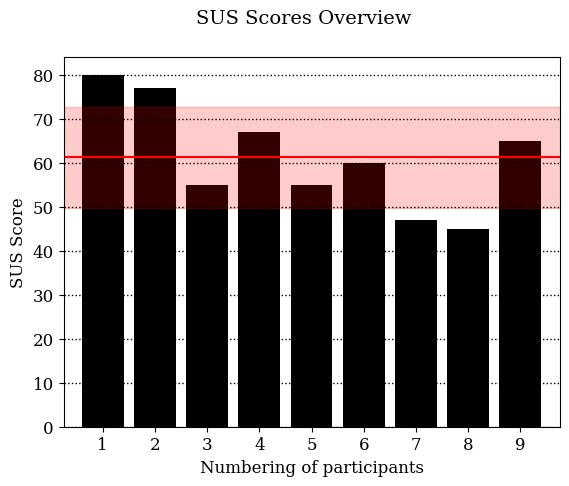

In [123]:
# Q201_01 bis Q201_10
df_sus = df[["Q201_01", "Q201_02", "Q201_03", "Q201_04", "Q201_05", "Q201_06", "Q201_07", "Q201_08", "Q201_09", "Q201_10"]].copy()
sus_info = getSUS(df_sus)
print(f"SUS Scores are:\n{sus_info}")


fig_sus, ax_sus = plt.subplots()
x = []
for i in range(1,len(sus_info)+1):
    x.append(i)
ax_sus.bar(x, sus_info, color="black")
length_x = len(x)
x.insert(0,0)
x.append(len(x))
mean = np.mean(sus_info)
std = np.std(sus_info)
ax_sus.fill_between(x, mean-std, mean+std, alpha = 0.2, color="red")

fig_sus.suptitle("SUS Scores Overview", fontsize=14, fontname="serif")
ax_sus.set_xlabel("Numbering of participants", fontsize=12, fontname="serif")
ax_sus.set_ylabel("SUS Score", fontsize=12, fontname="serif")
plt.xticks(np.arange(1, len(x), 1.0), fontsize=12, fontname="serif")
plt.yticks(fontsize=12, fontname="serif")
plt.xlim(0.25, length_x+0.75)
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.axhline(np.nanmean(sus_info), color="red")


fig_sus.savefig("figures/SUS_overview.png")

plt.show()

## A

SUS Scores are:
[77 67 60]


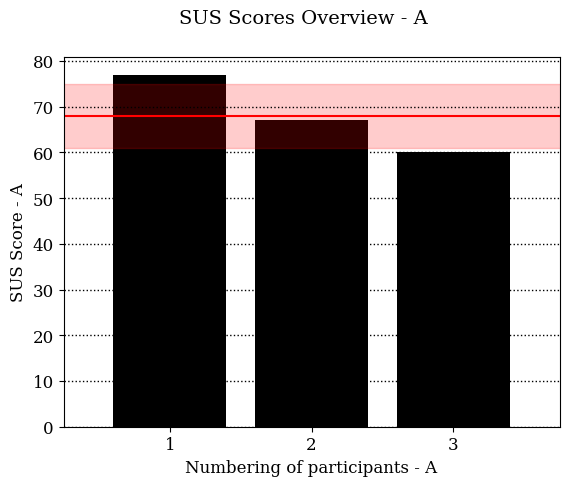

In [124]:
# Q201_01 bis Q201_10
df_sus_A = df_A[["Q201_01", "Q201_02", "Q201_03", "Q201_04", "Q201_05", "Q201_06", "Q201_07", "Q201_08", "Q201_09", "Q201_10"]].copy()
sus_info_A = getSUS(df_sus_A)
print(f"SUS Scores are:\n{sus_info_A}")


fig_sus, ax_sus = plt.subplots()
x = []
for i in range(1,len(sus_info_A)+1):
    x.append(i)
ax_sus.bar(x, sus_info_A, color="black")
length_x = len(x)
x.insert(0,0)
x.append(len(x))
mean = np.mean(sus_info_A)
std = np.std(sus_info_A)
ax_sus.fill_between(x, mean-std, mean+std, alpha = 0.2, color="red")

fig_sus.suptitle("SUS Scores Overview - A", fontsize=14, fontname="serif")
ax_sus.set_xlabel("Numbering of participants - A", fontsize=12, fontname="serif")
ax_sus.set_ylabel("SUS Score - A", fontsize=12, fontname="serif")
plt.xticks(np.arange(1, len(x), 1.0), fontsize=12, fontname="serif")
plt.yticks(fontsize=12, fontname="serif")
plt.xlim(0.25, length_x+0.75)
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.axhline(np.nanmean(sus_info_A), color="red")


fig_sus.savefig("figures/SUS_overview_A.png")

plt.show()

## B

SUS Scores are:
[80 55 55 47 45 65]


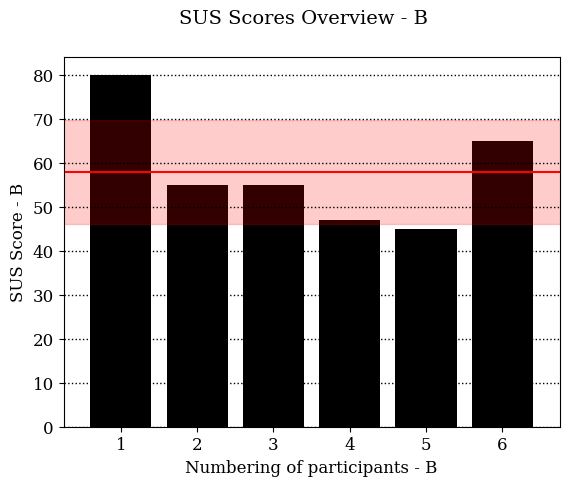

In [125]:
# Q201_01 bis Q201_10
df_sus_B = df_B[["Q201_01", "Q201_02", "Q201_03", "Q201_04", "Q201_05", "Q201_06", "Q201_07", "Q201_08", "Q201_09", "Q201_10"]].copy()
sus_info_B = getSUS(df_sus_B)
print(f"SUS Scores are:\n{sus_info_B}")


fig_sus, ax_sus = plt.subplots()
x = []
for i in range(1,len(sus_info_B)+1):
    x.append(i)
ax_sus.bar(x, sus_info_B, color="black")
length_x = len(x)
x.insert(0,0)
x.append(len(x))
mean = np.mean(sus_info_B)
std = np.std(sus_info_B)
ax_sus.fill_between(x, mean-std, mean+std, alpha = 0.2, color="red")

fig_sus.suptitle("SUS Scores Overview - B", fontsize=14, fontname="serif")
ax_sus.set_xlabel("Numbering of participants - B", fontsize=12, fontname="serif")
ax_sus.set_ylabel("SUS Score - B", fontsize=12, fontname="serif")
plt.xticks(np.arange(1, len(x), 1.0), fontsize=12, fontname="serif")
plt.yticks(fontsize=12, fontname="serif")
plt.xlim(0.25, length_x+0.75)
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.axhline(np.nanmean(sus_info_B), color="red")


fig_sus.savefig("figures/SUS_overview_B.png")

plt.show()

## Plotten
## All

Durchschnitt-SUS: 61.22
Median-SUS: 60.0


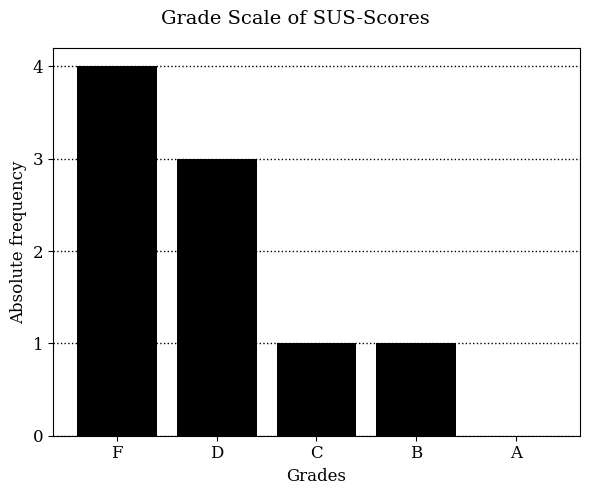

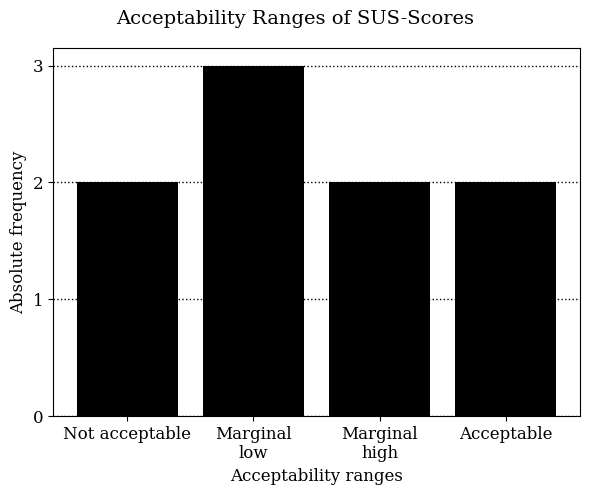

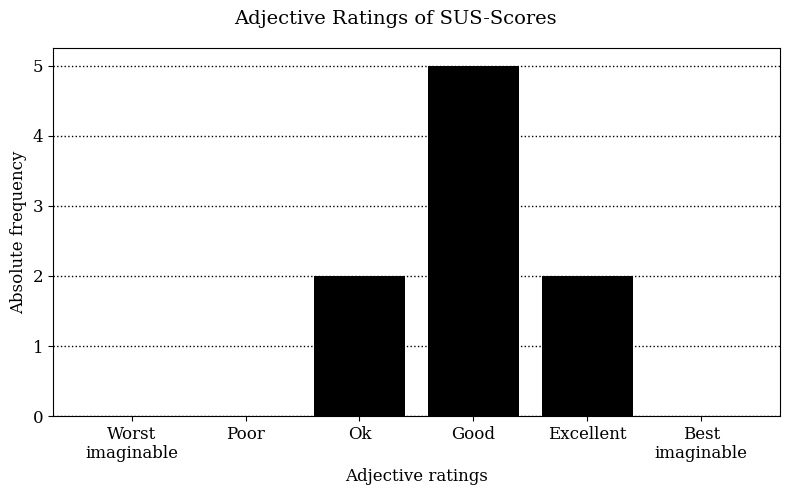

In [126]:
print(f"Durchschnitt-SUS: {round(np.mean(sus_info),2)}")
print(f"Median-SUS: {round(np.median(sus_info),2)}")

dict = ["F", "D", "C", "B", "A"]
sums_grade_scale = [0,0,0,0,0]
for i in range(len(sus_info)):
    if sus_info[i] < 60:
        sums_grade_scale[0] += 1
    if sus_info[i] >= 60 and sus_info[i] < 70:
        sums_grade_scale[1] += 1
    if sus_info[i] >= 70 and sus_info[i] < 80:
        sums_grade_scale[2] += 1
    if sus_info[i] >= 80 and sus_info[i] < 90:
        sums_grade_scale[3] += 1
    if sus_info[i] >= 90 and sus_info[i] <= 100:
        sums_grade_scale[4] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(6,5))
fig_sums_grade_scale.suptitle("Grade Scale of SUS-Scores", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Grades", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_grades.png")

plt.show()


# acceptability ranges

dict = ["Not acceptable", "Marginal\nlow", "Marginal\nhigh", "Acceptable"]
sums_grade_scale = [0,0,0,0]
for i in range(len(sus_info)):
    if sus_info[i] < 50:
        sums_grade_scale[0] += 1
    if sus_info[i] >= 50 and sus_info[i] < 62:
        sums_grade_scale[1] += 1
    if sus_info[i] >= 62 and sus_info[i] < 70:
        sums_grade_scale[2] += 1
    if sus_info[i] >= 70 and sus_info[i] <= 100:
        sums_grade_scale[3] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(6,5))
fig_sums_grade_scale.suptitle("Acceptability Ranges of SUS-Scores", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Acceptability ranges", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_acceptability.png")

plt.show()


# adjective ratings

dict = ["Worst\nimaginable", "Poor", "Ok", "Good", "Excellent", "Best\nimaginable"]
sums_grade_scale = [0,0,0,0,0,0]
for i in range(len(sus_info)):
    if sus_info[i] < 25:
        sums_grade_scale[0] += 1
    if sus_info[i] >= 25 and sus_info[i] < 38:
        sums_grade_scale[1] += 1
    if sus_info[i] >= 38 and sus_info[i] < 52:
        sums_grade_scale[2] += 1
    if sus_info[i] >= 52 and sus_info[i] < 73:
        sums_grade_scale[3] += 1
    if sus_info[i] >= 73 and sus_info[i] < 85:
        sums_grade_scale[4] += 1
    if sus_info[i] >= 85 and sus_info[i] <= 100:
        sums_grade_scale[4] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(8,5))
fig_sums_grade_scale.suptitle("Adjective Ratings of SUS-Scores", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Adjective ratings", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_adjective_ratings.png")

plt.show()

## A

Durchschnitt-SUS: 68.0
Median-SUS: 67.0


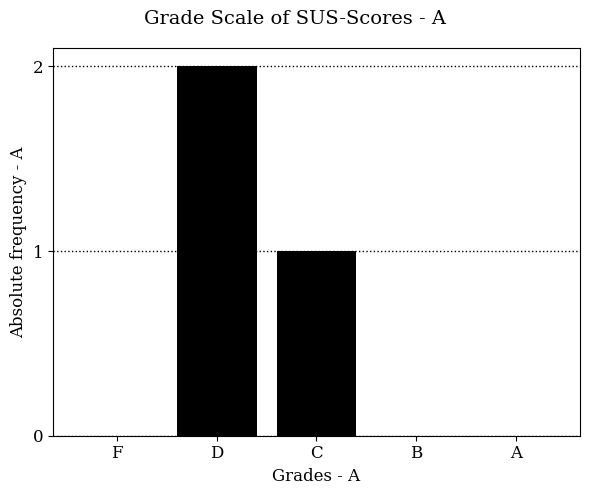

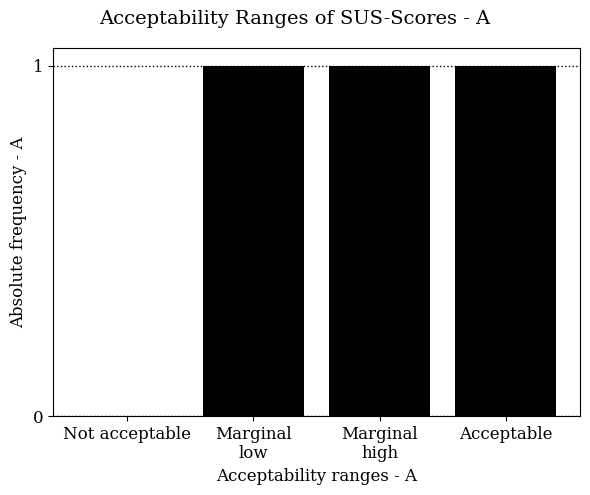

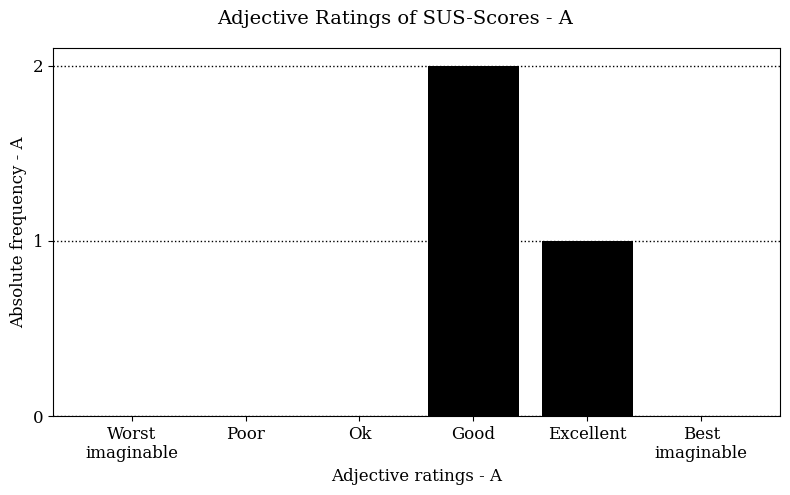

In [127]:
print(f"Durchschnitt-SUS: {round(np.mean(sus_info_A),2)}")
print(f"Median-SUS: {round(np.median(sus_info_A),2)}")

dict = ["F", "D", "C", "B", "A"]
sums_grade_scale = [0,0,0,0,0]
for i in range(len(sus_info_A)):
    if sus_info_A[i] < 60:
        sums_grade_scale[0] += 1
    if sus_info_A[i] >= 60 and sus_info_A[i] < 70:
        sums_grade_scale[1] += 1
    if sus_info_A[i] >= 70 and sus_info_A[i] < 80:
        sums_grade_scale[2] += 1
    if sus_info_A[i] >= 80 and sus_info_A[i] < 90:
        sums_grade_scale[3] += 1
    if sus_info_A[i] >= 90 and sus_info_A[i] <= 100:
        sums_grade_scale[4] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(6,5))
fig_sums_grade_scale.suptitle("Grade Scale of SUS-Scores - A", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Grades - A", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_grades_A.png")

plt.show()


# acceptability ranges

dict = ["Not acceptable", "Marginal\nlow", "Marginal\nhigh", "Acceptable"]
sums_grade_scale = [0,0,0,0]
for i in range(len(sus_info_A)):
    if sus_info_A[i] < 50:
        sums_grade_scale[0] += 1
    if sus_info_A[i] >= 50 and sus_info_A[i] < 62:
        sums_grade_scale[1] += 1
    if sus_info_A[i] >= 62 and sus_info_A[i] < 70:
        sums_grade_scale[2] += 1
    if sus_info_A[i] >= 70 and sus_info_A[i] <= 100:
        sums_grade_scale[3] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(6,5))
fig_sums_grade_scale.suptitle("Acceptability Ranges of SUS-Scores - A", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Acceptability ranges - A", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_acceptability_A.png")

plt.show()


# adjective ratings

dict = ["Worst\nimaginable", "Poor", "Ok", "Good", "Excellent", "Best\nimaginable"]
sums_grade_scale = [0,0,0,0,0,0]
for i in range(len(sus_info_A)):
    if sus_info_A[i] < 25:
        sums_grade_scale[0] += 1
    if sus_info_A[i] >= 25 and sus_info_A[i] < 38:
        sums_grade_scale[1] += 1
    if sus_info_A[i] >= 38 and sus_info_A[i] < 52:
        sums_grade_scale[2] += 1
    if sus_info_A[i] >= 52 and sus_info_A[i] < 73:
        sums_grade_scale[3] += 1
    if sus_info_A[i] >= 73 and sus_info_A[i] < 85:
        sums_grade_scale[4] += 1
    if sus_info_A[i] >= 85 and sus_info_A[i] <= 100:
        sums_grade_scale[4] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(8,5))
fig_sums_grade_scale.suptitle("Adjective Ratings of SUS-Scores - A", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Adjective ratings - A", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_adjective_ratings_A.png")

plt.show()

## B

Durchschnitt-SUS: 57.83
Median-SUS: 55.0


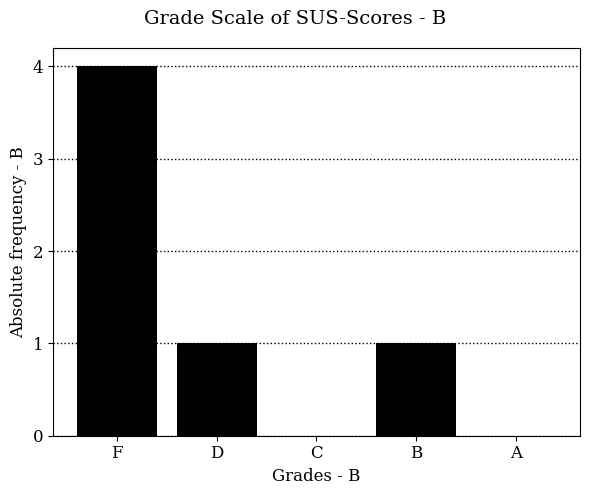

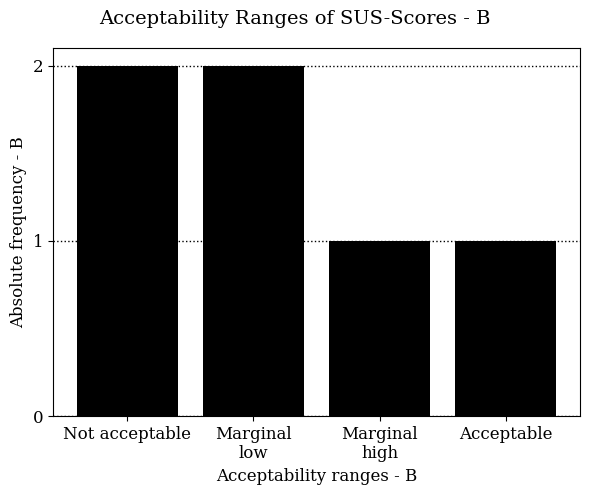

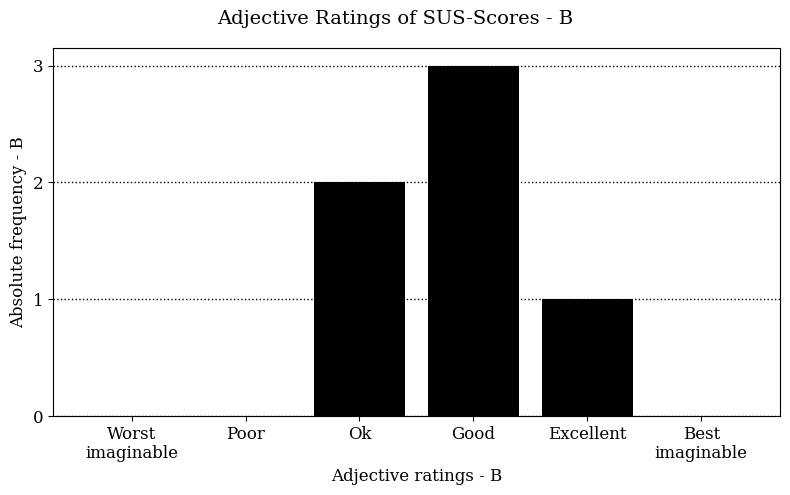

In [128]:
print(f"Durchschnitt-SUS: {round(np.mean(sus_info_B),2)}")
print(f"Median-SUS: {round(np.median(sus_info_B),2)}")

dict = ["F", "D", "C", "B", "A"]
sums_grade_scale = [0,0,0,0,0]
for i in range(len(sus_info_B)):
    if sus_info_B[i] < 60:
        sums_grade_scale[0] += 1
    if sus_info_B[i] >= 60 and sus_info_B[i] < 70:
        sums_grade_scale[1] += 1
    if sus_info_B[i] >= 70 and sus_info_B[i] < 80:
        sums_grade_scale[2] += 1
    if sus_info_B[i] >= 80 and sus_info_B[i] < 90:
        sums_grade_scale[3] += 1
    if sus_info_B[i] >= 90 and sus_info_B[i] <= 100:
        sums_grade_scale[4] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(6,5))
fig_sums_grade_scale.suptitle("Grade Scale of SUS-Scores - B", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Grades - B", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_grades_B.png")

plt.show()


# acceptability ranges

dict = ["Not acceptable", "Marginal\nlow", "Marginal\nhigh", "Acceptable"]
sums_grade_scale = [0,0,0,0]
for i in range(len(sus_info_B)):
    if sus_info_B[i] < 50:
        sums_grade_scale[0] += 1
    if sus_info_B[i] >= 50 and sus_info_B[i] < 62:
        sums_grade_scale[1] += 1
    if sus_info_B[i] >= 62 and sus_info_B[i] < 70:
        sums_grade_scale[2] += 1
    if sus_info_B[i] >= 70 and sus_info_B[i] <= 100:
        sums_grade_scale[3] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(6,5))
fig_sums_grade_scale.suptitle("Acceptability Ranges of SUS-Scores - B", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Acceptability ranges - B", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_acceptability_B.png")

plt.show()


# adjective ratings

dict = ["Worst\nimaginable", "Poor", "Ok", "Good", "Excellent", "Best\nimaginable"]
sums_grade_scale = [0,0,0,0,0,0]
for i in range(len(sus_info_B)):
    if sus_info_B[i] < 25:
        sums_grade_scale[0] += 1
    if sus_info_B[i] >= 25 and sus_info_B[i] < 38:
        sums_grade_scale[1] += 1
    if sus_info_B[i] >= 38 and sus_info_B[i] < 52:
        sums_grade_scale[2] += 1
    if sus_info_B[i] >= 52 and sus_info_B[i] < 73:
        sums_grade_scale[3] += 1
    if sus_info_B[i] >= 73 and sus_info_B[i] < 85:
        sums_grade_scale[4] += 1
    if sus_info_B[i] >= 85 and sus_info_B[i] <= 100:
        sums_grade_scale[4] += 1


fig_sums_grade_scale, ax_sums_grade_scale = plt.subplots(figsize=(8,5))
fig_sums_grade_scale.suptitle("Adjective Ratings of SUS-Scores - B", fontsize=14, fontname="serif")
ax_sums_grade_scale.set_xlabel("Adjective ratings - B", fontsize=12, fontname="serif")
ax_sums_grade_scale.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(sums_grade_scale)+2, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sums_grade_scale.bar(dict, sums_grade_scale, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sums_grade_scale.savefig("figures/SUS_adjective_ratings_B.png")

plt.show()

# Game Experience Questionnaire

## All

In [129]:
def getGEQ(df):
    
    geq_score = []
    
        
    reverser = [1-1,3-1,5-1,7-1,9-1]
    not_reverser = [2-1,4-1,6-1,8-1,10-1]
    df_array = df.to_numpy()
    #print(f"\nGEQ-Score:\n{df_array}")
    for j in range(df_array.shape[0]): # über alle Reihen (Teilnehmende) gehen
        for i in not_reverser:
            df_array[j][i-1] = df_array[j][i-1] - 1
        for i in reverser:
            df_array[j][i-1] = 5 - df_array[j][i-1]

    sums = []
    for k in range(df_array.shape[0]):
        sum = 0
        for add in range(len(df_array[k])):
           sum += df_array[k][add]

        sums.append(sum)

    sums = np.array(sums)
    for i in range(len(sums)):
        sums[i] *= 2.5
    return sums

# Q301_01 bis Q301_33
df_geq = df[["Q301_01", "Q301_02", "Q301_03", "Q301_04", "Q301_05", "Q301_06", "Q301_07", "Q301_08", "Q301_09", "Q301_10",
             "Q301_11", "Q301_12", "Q301_13", "Q301_14", "Q301_15", "Q301_16", "Q301_17", "Q301_18", "Q301_19", "Q301_20",
             "Q301_21", "Q301_22", "Q301_23", "Q301_24", "Q301_25", "Q301_26", "Q301_27", "Q301_28", "Q301_29", "Q301_30",
             "Q301_31", "Q301_32", "Q301_33"]].copy()

# competence
items = [2-1,10-1,15-1,17-1,21-1]

df_array = df_geq.to_numpy()
means = np.zeros(df_array.shape[0])

for j in range(df_array.shape[0]):
    for i in items:
        means[j] += df_array[j][i]
    means[j] = round(means[j] / len(items),2)

competence_scores = means
print(f"Competence:\n{competence_scores}\n")

# Sensory and Imaginative Immersion
items = [3-1,12-1,18-1,19-1,27-1,30-1]

df_array = df_geq.to_numpy()
means = np.zeros(df_array.shape[0])

for j in range(df_array.shape[0]):
    for i in items:
        means[j] += df_array[j][i]

    means[j] = round(means[j] / len(items),2)

sensory_scores = means
print(f"Sensory and Imaginative Immersion:\n{sensory_scores}\n")


# Flow
items = [5-1,13-1,25-1,28-1,31-1]

df_array = df_geq.to_numpy()
means = np.zeros(df_array.shape[0])

for j in range(df_array.shape[0]):
    for i in items:
        means[j] += df_array[j][i]

    means[j] = round(means[j] / len(items),2)

flow_scores = means
print(f"Flow:\n{flow_scores}\n")


# Tension/Annoyance
items = [22-1,24-1,29-1]

df_array = df_geq.to_numpy()
means = np.zeros(df_array.shape[0])

for j in range(df_array.shape[0]):
    for i in items:
        means[j] += df_array[j][i]

    means[j] = round(means[j] / len(items),2)

tension_scores = means
print(f"Tension/Annoyance:\n{tension_scores}\n")


# Challenge
items = [11-1,23-1,26-1,32-1,33-1]

df_array = df_geq.to_numpy()
means = np.zeros(df_array.shape[0])

for j in range(df_array.shape[0]):
    for i in items:
        means[j] += df_array[j][i]

    means[j] = round(means[j] / len(items),2)

chal_scores = means
print(f"Challenge:\n{chal_scores}\n")


# Negative affect
items = [7-1,8-1,9-1,16-1]

df_array = df_geq.to_numpy()
means = np.zeros(df_array.shape[0])

for j in range(df_array.shape[0]):
    for i in items:
        means[j] += df_array[j][i]

    means[j] = round(means[j] / len(items),2)

negative_affect_scores = means
print(f"Negative affect:\n{negative_affect_scores}\n")



# Postitive affect
items = [1-1,4-1,6-1,14-1,20-1]

df_array = df_geq.to_numpy()
means = np.zeros(df_array.shape[0])

for j in range(df_array.shape[0]):
    for i in items:
        means[j] += df_array[j][i]

    means[j] = round(means[j] / len(items),2)

positive_affect_scores = means
print(f"Positive affect:\n{positive_affect_scores}\n")

print("Min value = 1\nMax value = 5")

Competence:
[3.4 3.4 3.2 3.4 2.4 2.4 2.2 2.2 2.8]

Sensory and Imaginative Immersion:
[3.   3.33 3.67 3.5  3.17 3.5  2.5  2.67 2.83]

Flow:
[3.8 3.4 4.  2.8 2.4 3.8 2.8 3.  2. ]

Tension/Annoyance:
[2.   1.   2.   2.   2.33 2.   3.   1.   1.67]

Challenge:
[2.2 1.6 3.  2.4 2.  3.4 3.8 1.  2.8]

Negative affect:
[2.   1.75 2.   2.5  2.25 1.75 3.   1.5  1.75]

Positive affect:
[3.8 4.  4.6 3.8 3.2 4.2 2.8 2.8 3.8]

Min value = 1
Max value = 5


## A

In [130]:
# Q301_01 bis Q301_33
df_geq_A = df_A[["Q301_01", "Q301_02", "Q301_03", "Q301_04", "Q301_05", "Q301_06", "Q301_07", "Q301_08", "Q301_09", "Q301_10",
             "Q301_11", "Q301_12", "Q301_13", "Q301_14", "Q301_15", "Q301_16", "Q301_17", "Q301_18", "Q301_19", "Q301_20",
             "Q301_21", "Q301_22", "Q301_23", "Q301_24", "Q301_25", "Q301_26", "Q301_27", "Q301_28", "Q301_29", "Q301_30",
             "Q301_31", "Q301_32", "Q301_33"]].copy()

# competence
items = [2-1,10-1,15-1,17-1,21-1]

df_array_A = df_geq_A.to_numpy()
means_A = np.zeros(df_array_A.shape[0])

for j in range(df_array_A.shape[0]):
    for i in items:
        means_A[j] += df_array_A[j][i]
    means_A[j] = round(means_A[j] / len(items),2)

competence_scores_A = means_A
print(f"Competence:\n{competence_scores_A}\n")

# Sensory and Imaginative Immersion
items = [3-1,12-1,18-1,19-1,27-1,30-1]

df_array_A = df_geq_A.to_numpy()
means_A = np.zeros(df_array_A.shape[0])

for j in range(df_array_A.shape[0]):
    for i in items:
        means_A[j] += df_array_A[j][i]

    means_A[j] = round(means_A[j] / len(items),2)

sensory_scores_A = means_A
print(f"Sensory and Imaginative Immersion:\n{sensory_scores_A}\n")


# Flow
items = [5-1,13-1,25-1,28-1,31-1]

df_array_A = df_geq_A.to_numpy()
means_A = np.zeros(df_array_A.shape[0])

for j in range(df_array_A.shape[0]):
    for i in items:
        means_A[j] += df_array_A[j][i]

    means_A[j] = round(means_A[j] / len(items),2)

flow_scores_A = means_A
print(f"Flow:\n{flow_scores_A}\n")


# Tension/Annoyance
items = [22-1,24-1,29-1]

df_array_A = df_geq_A.to_numpy()
means_A = np.zeros(df_array_A.shape[0])

for j in range(df_array_A.shape[0]):
    for i in items:
        means_A[j] += df_array_A[j][i]

    means_A[j] = round(means_A[j] / len(items),2)

tension_scores_A = means_A
print(f"Tension/Annoyance:\n{tension_scores_A}\n")


# Challenge
items = [11-1,23-1,26-1,32-1,33-1]

df_array_A = df_geq_A.to_numpy()
means_A = np.zeros(df_array_A.shape[0])

for j in range(df_array_A.shape[0]):
    for i in items:
        means_A[j] += df_array_A[j][i]

    means_A[j] = round(means_A[j] / len(items),2)

chal_scores_A = means_A
print(f"Challenge:\n{chal_scores_A}\n")


# Negative affect
items = [7-1,8-1,9-1,16-1]

df_array_A = df_geq_A.to_numpy()
means_A = np.zeros(df_array_A.shape[0])

for j in range(df_array_A.shape[0]):
    for i in items:
        means_A[j] += df_array_A[j][i]

    means_A[j] = round(means_A[j] / len(items),2)

negative_affect_scores_A = means_A
print(f"Negative affect:\n{negative_affect_scores_A}\n")



# Postitive affect
items = [1-1,4-1,6-1,14-1,20-1]

df_array_A = df_geq_A.to_numpy()
means_A = np.zeros(df_array_A.shape[0])

for j in range(df_array_A.shape[0]):
    for i in items:
        means_A[j] += df_array_A[j][i]

    means_A[j] = round(means_A[j] / len(items),2)

positive_affect_scores_A = means_A
print(f"Positive affect:\n{positive_affect_scores_A}\n")

print("Min value = 1\nMax value = 5")

Competence:
[3.4 3.4 2.4]

Sensory and Imaginative Immersion:
[3.33 3.5  3.5 ]

Flow:
[3.4 2.8 3.8]

Tension/Annoyance:
[1. 2. 2.]

Challenge:
[1.6 2.4 3.4]

Negative affect:
[1.75 2.5  1.75]

Positive affect:
[4.  3.8 4.2]

Min value = 1
Max value = 5


## B

In [131]:
# Q301_01 bis Q301_33
df_geq_B = df_B[["Q301_01", "Q301_02", "Q301_03", "Q301_04", "Q301_05", "Q301_06", "Q301_07", "Q301_08", "Q301_09", "Q301_10",
             "Q301_11", "Q301_12", "Q301_13", "Q301_14", "Q301_15", "Q301_16", "Q301_17", "Q301_18", "Q301_19", "Q301_20",
             "Q301_21", "Q301_22", "Q301_23", "Q301_24", "Q301_25", "Q301_26", "Q301_27", "Q301_28", "Q301_29", "Q301_30",
             "Q301_31", "Q301_32", "Q301_33"]].copy()

# competence
items = [2-1,10-1,15-1,17-1,21-1]

df_array_B = df_geq_B.to_numpy()
means_B = np.zeros(df_array_B.shape[0])

for j in range(df_array_B.shape[0]):
    for i in items:
        means_B[j] += df_array_B[j][i]
    means_B[j] = round(means_B[j] / len(items),2)

competence_scores_B = means_B
print(f"Competence:\n{competence_scores_B}\n")

# Sensory and Imaginative Immersion
items = [3-1,12-1,18-1,19-1,27-1,30-1]

df_array_B = df_geq_B.to_numpy()
means_B = np.zeros(df_array_B.shape[0])

for j in range(df_array_B.shape[0]):
    for i in items:
        means_B[j] += df_array_B[j][i]
    means_B[j] = round(means_B[j] / len(items),2)

sensory_scores_B = means_B
print(f"Sensory and Imaginative Immersion:\n{sensory_scores_B}\n")


# Flow
items = [5-1,13-1,25-1,28-1,31-1]

df_array_B = df_geq_B.to_numpy()
means_B = np.zeros(df_array_B.shape[0])

for j in range(df_array_B.shape[0]):
    for i in items:
        means_B[j] += df_array_B[j][i]
    means_B[j] = round(means_B[j] / len(items),2)

flow_scores_B = means_B
print(f"Flow:\n{flow_scores_B}\n")


# Tension/Annoyance
items = [22-1,24-1,29-1]

df_array_B = df_geq_B.to_numpy()
means_B = np.zeros(df_array_B.shape[0])

for j in range(df_array_B.shape[0]):
    for i in items:
        means_B[j] += df_array_B[j][i]
    means_B[j] = round(means_B[j] / len(items),2)

tension_scores_B = means_B
print(f"Tension/Annoyance:\n{tension_scores_B}\n")


# Challenge
items = [11-1,23-1,26-1,32-1,33-1]

df_array_B = df_geq_B.to_numpy()
means_B = np.zeros(df_array_B.shape[0])

for j in range(df_array_B.shape[0]):
    for i in items:
        means_B[j] += df_array_B[j][i]
    means_B[j] = round(means_B[j] / len(items),2)

chal_scores_B = means_B
print(f"Challenge:\n{chal_scores_B}\n")


# Negative affect
items = [7-1,8-1,9-1,16-1]

df_array_B = df_geq_B.to_numpy()
means_B = np.zeros(df_array_B.shape[0])

for j in range(df_array_B.shape[0]):
    for i in items:
        means_B[j] += df_array_B[j][i]
    means_B[j] = round(means_B[j] / len(items),2)

negative_affect_scores_B = means_B
print(f"Negative affect:\n{negative_affect_scores_B}\n")



# Postitive affect
items = [1-1,4-1,6-1,14-1,20-1]

df_array_B = df_geq_B.to_numpy()
means_B = np.zeros(df_array_B.shape[0])

for j in range(df_array_B.shape[0]):
    for i in items:
        means_B[j] += df_array_B[j][i]
    means_B[j] = round(means_B[j] / len(items),2)

positive_affect_scores_B = means_B
print(f"Positive affect:\n{positive_affect_scores_B}\n")

print("Min value = 1\nMax value = 5")

Competence:
[3.4 3.2 2.4 2.2 2.2 2.8]

Sensory and Imaginative Immersion:
[3.   3.67 3.17 2.5  2.67 2.83]

Flow:
[3.8 4.  2.4 2.8 3.  2. ]

Tension/Annoyance:
[2.   2.   2.33 3.   1.   1.67]

Challenge:
[2.2 3.  2.  3.8 1.  2.8]

Negative affect:
[2.   2.   2.25 3.   1.5  1.75]

Positive affect:
[3.8 4.6 3.2 2.8 2.8 3.8]

Min value = 1
Max value = 5


## Plotten

## All

Mean-Competence: 2.82
Median-Competence: 2.8

Mean-Sensory and Imaginative Immersion: 3.13
Median-Sensory and Imaginative Immersion: 3.17

Mean-Flow: 3.11
Median-Flow: 3.0

Mean-Tension/Annoyance: 1.89
Median-Tension/Annoyance: 2.0

Mean-Challenge: 2.47
Median-Challenge: 2.4

Mean-Negative affect: 2.06
Median-Negative affect: 2.0

Mean-Positive affect: 3.67
Median-Positive affect: 3.8


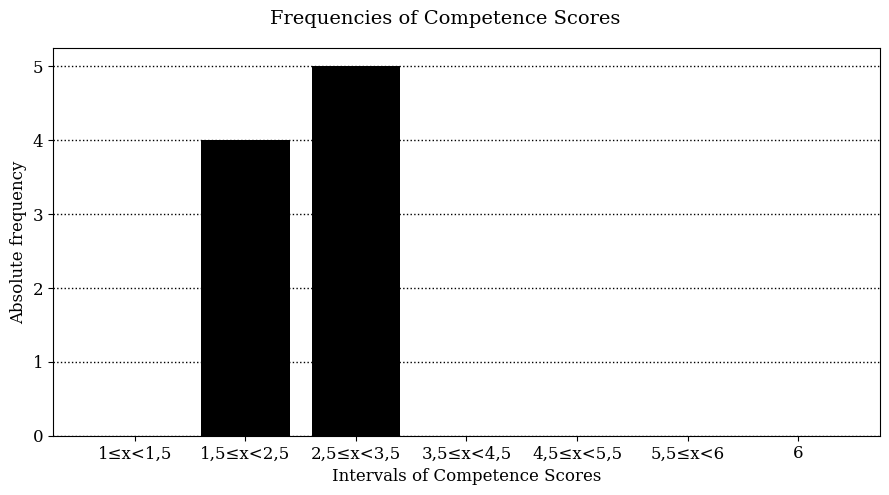

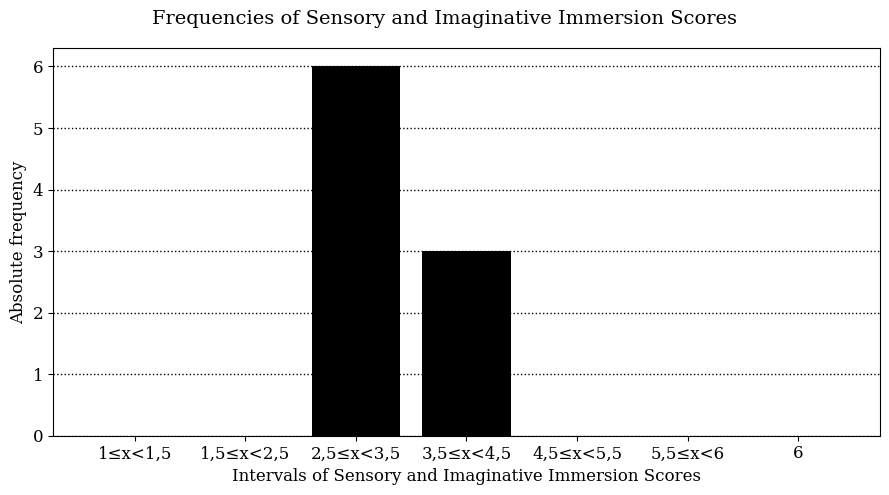

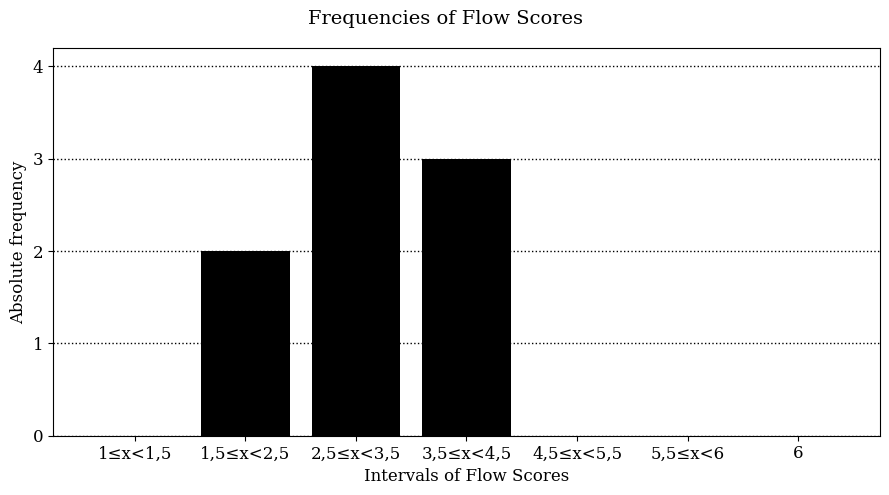

In [ ]:
print(f"Mean-Competence: {round(np.mean(competence_scores),2)}")
print(f"Median-Competence: {round(np.median(competence_scores),2)}")
print("")
print(f"Mean-Sensory and Imaginative Immersion: {round(np.mean(sensory_scores),2)}")
print(f"Median-Sensory and Imaginative Immersion: {round(np.median(sensory_scores),2)}")
print("")
print(f"Mean-Flow: {round(np.mean(flow_scores),2)}")
print(f"Median-Flow: {round(np.median(flow_scores),2)}")
print("")
print(f"Mean-Tension/Annoyance: {round(np.mean(tension_scores),2)}")
print(f"Median-Tension/Annoyance: {round(np.median(tension_scores),2)}")
print("")
print(f"Mean-Challenge: {round(np.mean(chal_scores),2)}")
print(f"Median-Challenge: {round(np.median(chal_scores),2)}")
print("")
print(f"Mean-Negative affect: {round(np.mean(negative_affect_scores),2)}")
print(f"Median-Negative affect: {round(np.median(negative_affect_scores),2)}")
print("")
print(f"Mean-Positive affect: {round(np.mean(positive_affect_scores),2)}")
print(f"Median-Positive affect: {round(np.median(positive_affect_scores),2)}")

figsize_core = (9,5)

dict = ["1≤x<1,5", "1,5≤x<2,5", "2,5≤x<3,5", "3,5≤x<4,5", "4,5≤x<5,5", "5,5≤x<6", "6"]
counter = [0,0,0,0,0,0,0]
for i in range(len(competence_scores)):
    if competence_scores[i] >= 1 and competence_scores[i] < 1.5:
        counter[0] += 1
    if competence_scores[i] >= 1.5 and competence_scores[i] < 2.5:
        counter[1] += 1
    if competence_scores[i] >= 2.5 and competence_scores[i] < 3.5:
        counter[2] += 1
    if competence_scores[i] >= 3.5 and competence_scores[i] < 4.5:
        counter[3] += 1
    if competence_scores[i] >= 4.5 and competence_scores[i] < 5.5:
        counter[4] += 1
    if competence_scores[i] >= 5.5 and competence_scores[i] < 6:
        counter[5] += 1
    if competence_scores[i] == 6:
        counter[6] += 1

fig_sensory_scores, ax_sensory_scores = plt.subplots(figsize=figsize_core)
fig_sensory_scores.suptitle("Frequencies of Competence Scores", fontsize=14, fontname="serif")
ax_sensory_scores.set_xlabel("Intervals of Competence Scores", fontsize=12, fontname="serif")
ax_sensory_scores.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sensory_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sensory_scores.savefig("figures/sensory_scores.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(sensory_scores)):
    if sensory_scores[i] >= 1 and sensory_scores[i] < 1.5:
        counter[0] += 1
    if sensory_scores[i] >= 1.5 and sensory_scores[i] < 2.5:
        counter[1] += 1
    if sensory_scores[i] >= 2.5 and sensory_scores[i] < 3.5:
        counter[2] += 1
    if sensory_scores[i] >= 3.5 and sensory_scores[i] < 4.5:
        counter[3] += 1
    if sensory_scores[i] >= 4.5 and sensory_scores[i] < 5.5:
        counter[4] += 1
    if sensory_scores[i] >= 5.5 and sensory_scores[i] < 6:
        counter[5] += 1
    if sensory_scores[i] == 6:
        counter[6] += 1

fig_sensory_scores, ax_sensory_scores = plt.subplots(figsize=figsize_core)
fig_sensory_scores.suptitle("Frequencies of Sensory and Imaginative Immersion Scores", fontsize=14, fontname="serif")
ax_sensory_scores.set_xlabel("Intervals of Sensory and Imaginative Immersion Scores", fontsize=12, fontname="serif")
ax_sensory_scores.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sensory_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sensory_scores.savefig("figures/sensory_scores.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(flow_scores)):
    if flow_scores[i] >= 1 and flow_scores[i] < 1.5:
        counter[0] += 1
    if flow_scores[i] >= 1.5 and flow_scores[i] < 2.5:
        counter[1] += 1
    if flow_scores[i] >= 2.5 and flow_scores[i] < 3.5:
        counter[2] += 1
    if flow_scores[i] >= 3.5 and flow_scores[i] < 4.5:
        counter[3] += 1
    if flow_scores[i] >= 4.5 and flow_scores[i] < 5.5:
        counter[4] += 1
    if flow_scores[i] >= 5.5 and flow_scores[i] < 6:
        counter[5] += 1
    if flow_scores[i] == 6:
        counter[6] += 1

fig_flow_scores, ax_flow_scores = plt.subplots(figsize=figsize_core)
fig_flow_scores.suptitle("Frequencies of Flow Scores", fontsize=14, fontname="serif")
ax_flow_scores.set_xlabel("Intervals of Flow Scores", fontsize=12, fontname="serif")
ax_flow_scores.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_flow_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_flow_scores.savefig("figures/flow_scores.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(tension_scores)):
    if tension_scores[i] >= 1 and tension_scores[i] < 1.5:
        counter[0] += 1
    if tension_scores[i] >= 1.5 and tension_scores[i] < 2.5:
        counter[1] += 1
    if tension_scores[i] >= 2.5 and tension_scores[i] < 3.5:
        counter[2] += 1
    if tension_scores[i] >= 3.5 and tension_scores[i] < 4.5:
        counter[3] += 1
    if tension_scores[i] >= 4.5 and tension_scores[i] < 5.5:
        counter[4] += 1
    if tension_scores[i] >= 5.5 and tension_scores[i] < 6:
        counter[5] += 1
    if tension_scores[i] == 6:
        counter[6] += 1

fig_tension_scores, ax_tension_scores = plt.subplots(figsize=figsize_core)
fig_tension_scores.suptitle("Frequencies of Tension/Annoyance Scores", fontsize=14, fontname="serif")
ax_tension_scores.set_xlabel("Intervals of Tension/Annoyance Scores", fontsize=12, fontname="serif")
ax_tension_scores.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_tension_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_tension_scores.savefig("figures/tension_scores.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(chal_scores)):
    if chal_scores[i] >= 1 and chal_scores[i] < 1.5:
        counter[0] += 1
    if chal_scores[i] >= 1.5 and chal_scores[i] < 2.5:
        counter[1] += 1
    if chal_scores[i] >= 2.5 and chal_scores[i] < 3.5:
        counter[2] += 1
    if chal_scores[i] >= 3.5 and chal_scores[i] < 4.5:
        counter[3] += 1
    if chal_scores[i] >= 4.5 and chal_scores[i] < 5.5:
        counter[4] += 1
    if chal_scores[i] >= 5.5 and chal_scores[i] < 6:
        counter[5] += 1
    if chal_scores[i] == 6:
        counter[6] += 1

fig_chal_scores, ax_chal_scores = plt.subplots(figsize=figsize_core)
fig_chal_scores.suptitle("Frequencies of Challenge Scores", fontsize=14, fontname="serif")
ax_chal_scores.set_xlabel("Intervals of Challenge Scores", fontsize=12, fontname="serif")
ax_chal_scores.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_chal_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_chal_scores.savefig("figures/chal_scores.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(negative_affect_scores)):
    if negative_affect_scores[i] >= 1 and negative_affect_scores[i] < 1.5:
        counter[0] += 1
    if negative_affect_scores[i] >= 1.5 and negative_affect_scores[i] < 2.5:
        counter[1] += 1
    if negative_affect_scores[i] >= 2.5 and negative_affect_scores[i] < 3.5:
        counter[2] += 1
    if negative_affect_scores[i] >= 3.5 and negative_affect_scores[i] < 4.5:
        counter[3] += 1
    if negative_affect_scores[i] >= 4.5 and negative_affect_scores[i] < 5.5:
        counter[4] += 1
    if negative_affect_scores[i] >= 5.5 and negative_affect_scores[i] < 6:
        counter[5] += 1
    if negative_affect_scores[i] == 6:
        counter[6] += 1

fig_negative_affect_scores, ax_negative_affect_scores = plt.subplots(figsize=figsize_core)
fig_negative_affect_scores.suptitle("Frequencies of Negative affect Scores", fontsize=14, fontname="serif")
ax_negative_affect_scores.set_xlabel("Intervals of Negative affect Scores", fontsize=12, fontname="serif")
ax_negative_affect_scores.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_negative_affect_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_negative_affect_scores.savefig("figures/negative_affect_scores.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(positive_affect_scores)):
    if positive_affect_scores[i] >= 1 and positive_affect_scores[i] < 1.5:
        counter[0] += 1
    if positive_affect_scores[i] >= 1.5 and positive_affect_scores[i] < 2.5:
        counter[1] += 1
    if positive_affect_scores[i] >= 2.5 and positive_affect_scores[i] < 3.5:
        counter[2] += 1
    if positive_affect_scores[i] >= 3.5 and positive_affect_scores[i] < 4.5:
        counter[3] += 1
    if positive_affect_scores[i] >= 4.5 and positive_affect_scores[i] < 5.5:
        counter[4] += 1
    if positive_affect_scores[i] >= 5.5 and positive_affect_scores[i] < 6:
        counter[5] += 1
    if positive_affect_scores[i] == 6:
        counter[6] += 1

fig_positive_affect_scores, ax_positive_affect_scores = plt.subplots(figsize=figsize_core)
fig_positive_affect_scores.suptitle("Frequencies of Positive affect Scores", fontsize=14, fontname="serif")
ax_positive_affect_scores.set_xlabel("Intervals of Positive affect Scores", fontsize=12, fontname="serif")
ax_positive_affect_scores.set_ylabel("Absolute frequency", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_positive_affect_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_positive_affect_scores.savefig("figures/positive_affect_scores.png")

plt.show()

## A

In [ ]:
print(f"Mean-Competence: {round(np.mean(competence_scores_A),2)}")
print(f"Median-Competence: {round(np.median(competence_scores_A),2)}")
print("")
print(f"Mean-Sensory and Imaginative Immersion: {round(np.mean(sensory_scores_A),2)}")
print(f"Median-Sensory and Imaginative Immersion: {round(np.median(sensory_scores_A),2)}")
print("")
print(f"Mean-Flow: {round(np.mean(flow_scores_A),2)}")
print(f"Median-Flow: {round(np.median(flow_scores_A),2)}")
print("")
print(f"Mean-Tension/Annoyance: {round(np.mean(tension_scores_A),2)}")
print(f"Median-Tension/Annoyance: {round(np.median(tension_scores_A),2)}")
print("")
print(f"Mean-Challenge: {round(np.mean(chal_scores_A),2)}")
print(f"Median-Challenge: {round(np.median(chal_scores_A),2)}")
print("")
print(f"Mean-Negative affect: {round(np.mean(negative_affect_scores_A),2)}")
print(f"Median-Negative affect: {round(np.median(negative_affect_scores_A),2)}")
print("")
print(f"Mean-Positive affect: {round(np.mean(positive_affect_scores_A),2)}")
print(f"Median-Positive affect: {round(np.median(positive_affect_scores_A),2)}")

figsize_core = (9,5)

dict = ["1≤x<1,5", "1,5≤x<2,5", "2,5≤x<3,5", "3,5≤x<4,5", "4,5≤x<5,5", "5,5≤x<6", "6"]
counter = [0,0,0,0,0,0,0]
for i in range(len(competence_scores_A)):
    if competence_scores_A[i] >= 1 and competence_scores_A[i] < 1.5:
        counter[0] += 1
    if competence_scores_A[i] >= 1.5 and competence_scores_A[i] < 2.5:
        counter[1] += 1
    if competence_scores_A[i] >= 2.5 and competence_scores_A[i] < 3.5:
        counter[2] += 1
    if competence_scores_A[i] >= 3.5 and competence_scores_A[i] < 4.5:
        counter[3] += 1
    if competence_scores_A[i] >= 4.5 and competence_scores_A[i] < 5.5:
        counter[4] += 1
    if competence_scores_A[i] >= 5.5 and competence_scores_A[i] < 6:
        counter[5] += 1
    if competence_scores_A[i] == 6:
        counter[6] += 1

fig_sensory_scores, ax_sensory_scores = plt.subplots(figsize=figsize_core)
fig_sensory_scores.suptitle("Frequencies of Competence Scores - A", fontsize=14, fontname="serif")
ax_sensory_scores.set_xlabel("Intervals of Competence Scores - A", fontsize=12, fontname="serif")
ax_sensory_scores.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sensory_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sensory_scores.savefig("figures/sensory_scores_A.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(sensory_scores_A)):
    if sensory_scores_A[i] >= 1 and sensory_scores_A[i] < 1.5:
        counter[0] += 1
    if sensory_scores_A[i] >= 1.5 and sensory_scores_A[i] < 2.5:
        counter[1] += 1
    if sensory_scores_A[i] >= 2.5 and sensory_scores_A[i] < 3.5:
        counter[2] += 1
    if sensory_scores_A[i] >= 3.5 and sensory_scores_A[i] < 4.5:
        counter[3] += 1
    if sensory_scores_A[i] >= 4.5 and sensory_scores_A[i] < 5.5:
        counter[4] += 1
    if sensory_scores_A[i] >= 5.5 and sensory_scores_A[i] < 6:
        counter[5] += 1
    if sensory_scores_A[i] == 6:
        counter[6] += 1

fig_sensory_scores, ax_sensory_scores = plt.subplots(figsize=figsize_core)
fig_sensory_scores.suptitle("Frequencies of Sensory and Imaginative Immersion Scores - A", fontsize=14, fontname="serif")
ax_sensory_scores.set_xlabel("Intervals of Sensory and Imaginative Immersion Scores - A", fontsize=12, fontname="serif")
ax_sensory_scores.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sensory_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sensory_scores.savefig("figures/sensory_scores_A.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(flow_scores_A)):
    if flow_scores_A[i] >= 1 and flow_scores_A[i] < 1.5:
        counter[0] += 1
    if flow_scores_A[i] >= 1.5 and flow_scores_A[i] < 2.5:
        counter[1] += 1
    if flow_scores_A[i] >= 2.5 and flow_scores_A[i] < 3.5:
        counter[2] += 1
    if flow_scores_A[i] >= 3.5 and flow_scores_A[i] < 4.5:
        counter[3] += 1
    if flow_scores_A[i] >= 4.5 and flow_scores_A[i] < 5.5:
        counter[4] += 1
    if flow_scores_A[i] >= 5.5 and flow_scores_A[i] < 6:
        counter[5] += 1
    if flow_scores_A[i] == 6:
        counter[6] += 1

fig_flow_scores, ax_flow_scores = plt.subplots(figsize=figsize_core)
fig_flow_scores.suptitle("Frequencies of Flow Scores - A", fontsize=14, fontname="serif")
ax_flow_scores.set_xlabel("Intervals of Flow Scores - A", fontsize=12, fontname="serif")
ax_flow_scores.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_flow_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_flow_scores.savefig("figures/flow_scores_A.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(tension_scores_A)):
    if tension_scores_A[i] >= 1 and tension_scores_A[i] < 1.5:
        counter[0] += 1
    if tension_scores_A[i] >= 1.5 and tension_scores_A[i] < 2.5:
        counter[1] += 1
    if tension_scores_A[i] >= 2.5 and tension_scores_A[i] < 3.5:
        counter[2] += 1
    if tension_scores_A[i] >= 3.5 and tension_scores_A[i] < 4.5:
        counter[3] += 1
    if tension_scores_A[i] >= 4.5 and tension_scores_A[i] < 5.5:
        counter[4] += 1
    if tension_scores_A[i] >= 5.5 and tension_scores_A[i] < 6:
        counter[5] += 1
    if tension_scores_A[i] == 6:
        counter[6] += 1

fig_tension_scores, ax_tension_scores = plt.subplots(figsize=figsize_core)
fig_tension_scores.suptitle("Frequencies of Tension/Annoyance Scores - A", fontsize=14, fontname="serif")
ax_tension_scores.set_xlabel("Intervals of Tension/Annoyance Scores - A", fontsize=12, fontname="serif")
ax_tension_scores.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_tension_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_tension_scores.savefig("figures/tension_scores_A.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(chal_scores_A)):
    if chal_scores_A[i] >= 1 and chal_scores_A[i] < 1.5:
        counter[0] += 1
    if chal_scores_A[i] >= 1.5 and chal_scores_A[i] < 2.5:
        counter[1] += 1
    if chal_scores_A[i] >= 2.5 and chal_scores_A[i] < 3.5:
        counter[2] += 1
    if chal_scores_A[i] >= 3.5 and chal_scores_A[i] < 4.5:
        counter[3] += 1
    if chal_scores_A[i] >= 4.5 and chal_scores_A[i] < 5.5:
        counter[4] += 1
    if chal_scores_A[i] >= 5.5 and chal_scores_A[i] < 6:
        counter[5] += 1
    if chal_scores_A[i] == 6:
        counter[6] += 1

fig_chal_scores, ax_chal_scores = plt.subplots(figsize=figsize_core)
fig_chal_scores.suptitle("Frequencies of Challenge Scores - A", fontsize=14, fontname="serif")
ax_chal_scores.set_xlabel("Intervals of Challenge Scores - A", fontsize=12, fontname="serif")
ax_chal_scores.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_chal_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_chal_scores.savefig("figures/chal_scores_A.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(negative_affect_scores_A)):
    if negative_affect_scores_A[i] >= 1 and negative_affect_scores_A[i] < 1.5:
        counter[0] += 1
    if negative_affect_scores_A[i] >= 1.5 and negative_affect_scores_A[i] < 2.5:
        counter[1] += 1
    if negative_affect_scores_A[i] >= 2.5 and negative_affect_scores_A[i] < 3.5:
        counter[2] += 1
    if negative_affect_scores_A[i] >= 3.5 and negative_affect_scores_A[i] < 4.5:
        counter[3] += 1
    if negative_affect_scores_A[i] >= 4.5 and negative_affect_scores_A[i] < 5.5:
        counter[4] += 1
    if negative_affect_scores_A[i] >= 5.5 and negative_affect_scores_A[i] < 6:
        counter[5] += 1
    if negative_affect_scores_A[i] == 6:
        counter[6] += 1

fig_negative_affect_scores, ax_negative_affect_scores = plt.subplots(figsize=figsize_core)
fig_negative_affect_scores.suptitle("Frequencies of Negative affect Scores - A", fontsize=14, fontname="serif")
ax_negative_affect_scores.set_xlabel("Intervals of Negative affect Scores - A", fontsize=12, fontname="serif")
ax_negative_affect_scores.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_negative_affect_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_negative_affect_scores.savefig("figures/negative_affect_scores_A.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(positive_affect_scores_A)):
    if positive_affect_scores_A[i] >= 1 and positive_affect_scores_A[i] < 1.5:
        counter[0] += 1
    if positive_affect_scores_A[i] >= 1.5 and positive_affect_scores_A[i] < 2.5:
        counter[1] += 1
    if positive_affect_scores_A[i] >= 2.5 and positive_affect_scores_A[i] < 3.5:
        counter[2] += 1
    if positive_affect_scores_A[i] >= 3.5 and positive_affect_scores_A[i] < 4.5:
        counter[3] += 1
    if positive_affect_scores_A[i] >= 4.5 and positive_affect_scores_A[i] < 5.5:
        counter[4] += 1
    if positive_affect_scores_A[i] >= 5.5 and positive_affect_scores_A[i] < 6:
        counter[5] += 1
    if positive_affect_scores_A[i] == 6:
        counter[6] += 1

fig_positive_affect_scores, ax_positive_affect_scores = plt.subplots(figsize=figsize_core)
fig_positive_affect_scores.suptitle("Frequencies of Positive affect Scores - A", fontsize=14, fontname="serif")
ax_positive_affect_scores.set_xlabel("Intervals of Positive affect Scores - A", fontsize=12, fontname="serif")
ax_positive_affect_scores.set_ylabel("Absolute frequency - A", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_positive_affect_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_positive_affect_scores.savefig("figures/positive_affect_scores_A.png")

plt.show()

## B

In [ ]:
print(f"Mean-Competence: {round(np.mean(competence_scores_B),2)}")
print(f"Median-Competence: {round(np.median(competence_scores_B),2)}")
print("")
print(f"Mean-Sensory and Imaginative Immersion: {round(np.mean(sensory_scores_B),2)}")
print(f"Median-Sensory and Imaginative Immersion: {round(np.median(sensory_scores_B),2)}")
print("")
print(f"Mean-Flow: {round(np.mean(flow_scores_B),2)}")
print(f"Median-Flow: {round(np.median(flow_scores_B),2)}")
print("")
print(f"Mean-Tension/Annoyance: {round(np.mean(tension_scores_B),2)}")
print(f"Median-Tension/Annoyance: {round(np.median(tension_scores_B),2)}")
print("")
print(f"Mean-Challenge: {round(np.mean(chal_scores_B),2)}")
print(f"Median-Challenge: {round(np.median(chal_scores_B),2)}")
print("")
print(f"Mean-Negative affect: {round(np.mean(negative_affect_scores_B),2)}")
print(f"Median-Negative affect: {round(np.median(negative_affect_scores_B),2)}")
print("")
print(f"Mean-Positive affect: {round(np.mean(positive_affect_scores_B),2)}")
print(f"Median-Positive affect: {round(np.median(positive_affect_scores_B),2)}")

figsize_core = (9,5)

dict = ["1≤x<1,5", "1,5≤x<2,5", "2,5≤x<3,5", "3,5≤x<4,5", "4,5≤x<5,5", "5,5≤x<6", "6"]
counter = [0,0,0,0,0,0,0]
for i in range(len(competence_scores_B)):
    if competence_scores_B[i] >= 1 and competence_scores_B[i] < 1.5:
        counter[0] += 1
    if competence_scores_B[i] >= 1.5 and competence_scores_B[i] < 2.5:
        counter[1] += 1
    if competence_scores_B[i] >= 2.5 and competence_scores_B[i] < 3.5:
        counter[2] += 1
    if competence_scores_B[i] >= 3.5 and competence_scores_B[i] < 4.5:
        counter[3] += 1
    if competence_scores_B[i] >= 4.5 and competence_scores_B[i] < 5.5:
        counter[4] += 1
    if competence_scores_B[i] >= 5.5 and competence_scores_B[i] < 6:
        counter[5] += 1
    if competence_scores_B[i] == 6:
        counter[6] += 1

fig_sensory_scores, ax_sensory_scores = plt.subplots(figsize=figsize_core)
fig_sensory_scores.suptitle("Frequencies of Competence Scores - B", fontsize=14, fontname="serif")
ax_sensory_scores.set_xlabel("Intervals of Competence Scores - B", fontsize=12, fontname="serif")
ax_sensory_scores.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sensory_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sensory_scores.savefig("figures/sensory_scores_B.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(sensory_scores_B)):
    if sensory_scores_B[i] >= 1 and sensory_scores_B[i] < 1.5:
        counter[0] += 1
    if sensory_scores_B[i] >= 1.5 and sensory_scores_B[i] < 2.5:
        counter[1] += 1
    if sensory_scores_B[i] >= 2.5 and sensory_scores_B[i] < 3.5:
        counter[2] += 1
    if sensory_scores_B[i] >= 3.5 and sensory_scores_B[i] < 4.5:
        counter[3] += 1
    if sensory_scores_B[i] >= 4.5 and sensory_scores_B[i] < 5.5:
        counter[4] += 1
    if sensory_scores_B[i] >= 5.5 and sensory_scores_B[i] < 6:
        counter[5] += 1
    if sensory_scores_B[i] == 6:
        counter[6] += 1

fig_sensory_scores, ax_sensory_scores = plt.subplots(figsize=figsize_core)
fig_sensory_scores.suptitle("Frequencies of Sensory and Imaginative Immersion Scores - B", fontsize=14, fontname="serif")
ax_sensory_scores.set_xlabel("Intervals of Sensory and Imaginative Immersion Scores - B", fontsize=12, fontname="serif")
ax_sensory_scores.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_sensory_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_sensory_scores.savefig("figures/sensory_scores_B.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(flow_scores_B)):
    if flow_scores_B[i] >= 1 and flow_scores_B[i] < 1.5:
        counter[0] += 1
    if flow_scores_B[i] >= 1.5 and flow_scores_B[i] < 2.5:
        counter[1] += 1
    if flow_scores_B[i] >= 2.5 and flow_scores_B[i] < 3.5:
        counter[2] += 1
    if flow_scores_B[i] >= 3.5 and flow_scores_B[i] < 4.5:
        counter[3] += 1
    if flow_scores_B[i] >= 4.5 and flow_scores_B[i] < 5.5:
        counter[4] += 1
    if flow_scores_B[i] >= 5.5 and flow_scores_B[i] < 6:
        counter[5] += 1
    if flow_scores_B[i] == 6:
        counter[6] += 1

fig_flow_scores, ax_flow_scores = plt.subplots(figsize=figsize_core)
fig_flow_scores.suptitle("Frequencies of Flow Scores - B", fontsize=14, fontname="serif")
ax_flow_scores.set_xlabel("Intervals of Flow Scores - B", fontsize=12, fontname="serif")
ax_flow_scores.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_flow_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_flow_scores.savefig("figures/flow_scores_B.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(tension_scores_B)):
    if tension_scores_B[i] >= 1 and tension_scores_B[i] < 1.5:
        counter[0] += 1
    if tension_scores_B[i] >= 1.5 and tension_scores_B[i] < 2.5:
        counter[1] += 1
    if tension_scores_B[i] >= 2.5 and tension_scores_B[i] < 3.5:
        counter[2] += 1
    if tension_scores_B[i] >= 3.5 and tension_scores_B[i] < 4.5:
        counter[3] += 1
    if tension_scores_B[i] >= 4.5 and tension_scores_B[i] < 5.5:
        counter[4] += 1
    if tension_scores_B[i] >= 5.5 and tension_scores_B[i] < 6:
        counter[5] += 1
    if tension_scores_B[i] == 6:
        counter[6] += 1

fig_tension_scores, ax_tension_scores = plt.subplots(figsize=figsize_core)
fig_tension_scores.suptitle("Frequencies of Tension/Annoyance Scores - B", fontsize=14, fontname="serif")
ax_tension_scores.set_xlabel("Intervals of Tension/Annoyance Scores - B", fontsize=12, fontname="serif")
ax_tension_scores.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_tension_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_tension_scores.savefig("figures/tension_scores_B.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(chal_scores_B)):
    if chal_scores_B[i] >= 1 and chal_scores_B[i] < 1.5:
        counter[0] += 1
    if chal_scores_B[i] >= 1.5 and chal_scores_B[i] < 2.5:
        counter[1] += 1
    if chal_scores_B[i] >= 2.5 and chal_scores_B[i] < 3.5:
        counter[2] += 1
    if chal_scores_B[i] >= 3.5 and chal_scores_B[i] < 4.5:
        counter[3] += 1
    if chal_scores_B[i] >= 4.5 and chal_scores_B[i] < 5.5:
        counter[4] += 1
    if chal_scores_B[i] >= 5.5 and chal_scores_B[i] < 6:
        counter[5] += 1
    if chal_scores_B[i] == 6:
        counter[6] += 1

fig_chal_scores, ax_chal_scores = plt.subplots(figsize=figsize_core)
fig_chal_scores.suptitle("Frequencies of Challenge Scores - B", fontsize=14, fontname="serif")
ax_chal_scores.set_xlabel("Intervals of Challenge Scores - B", fontsize=12, fontname="serif")
ax_chal_scores.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_chal_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_chal_scores.savefig("figures/chal_scores_B.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(negative_affect_scores_B)):
    if negative_affect_scores_B[i] >= 1 and negative_affect_scores_B[i] < 1.5:
        counter[0] += 1
    if negative_affect_scores_B[i] >= 1.5 and negative_affect_scores_B[i] < 2.5:
        counter[1] += 1
    if negative_affect_scores_B[i] >= 2.5 and negative_affect_scores_B[i] < 3.5:
        counter[2] += 1
    if negative_affect_scores_B[i] >= 3.5 and negative_affect_scores_B[i] < 4.5:
        counter[3] += 1
    if negative_affect_scores_B[i] >= 4.5 and negative_affect_scores_B[i] < 5.5:
        counter[4] += 1
    if negative_affect_scores_B[i] >= 5.5 and negative_affect_scores_B[i] < 6:
        counter[5] += 1
    if negative_affect_scores_B[i] == 6:
        counter[6] += 1

fig_negative_affect_scores, ax_negative_affect_scores = plt.subplots(figsize=figsize_core)
fig_negative_affect_scores.suptitle("Frequencies of Negative affect Scores - B", fontsize=14, fontname="serif")
ax_negative_affect_scores.set_xlabel("Intervals of Negative affect Scores - B", fontsize=12, fontname="serif")
ax_negative_affect_scores.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_negative_affect_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_negative_affect_scores.savefig("figures/negative_affect_scores_B.png")

plt.show()



counter = [0,0,0,0,0,0,0]
for i in range(len(positive_affect_scores_B)):
    if positive_affect_scores_B[i] >= 1 and positive_affect_scores_B[i] < 1.5:
        counter[0] += 1
    if positive_affect_scores_B[i] >= 1.5 and positive_affect_scores_B[i] < 2.5:
        counter[1] += 1
    if positive_affect_scores_B[i] >= 2.5 and positive_affect_scores_B[i] < 3.5:
        counter[2] += 1
    if positive_affect_scores_B[i] >= 3.5 and positive_affect_scores_B[i] < 4.5:
        counter[3] += 1
    if positive_affect_scores_B[i] >= 4.5 and positive_affect_scores_B[i] < 5.5:
        counter[4] += 1
    if positive_affect_scores_B[i] >= 5.5 and positive_affect_scores_B[i] < 6:
        counter[5] += 1
    if positive_affect_scores_B[i] == 6:
        counter[6] += 1

fig_positive_affect_scores, ax_positive_affect_scores = plt.subplots(figsize=figsize_core)
fig_positive_affect_scores.suptitle("Frequencies of Positive affect Scores - B", fontsize=14, fontname="serif")
ax_positive_affect_scores.set_xlabel("Intervals of Positive affect Scores - B", fontsize=12, fontname="serif")
ax_positive_affect_scores.set_ylabel("Absolute frequency - B", fontsize=12, fontname="serif")
plt.grid(axis="y", color="black", linestyle="dotted", linewidth="1")
plt.yticks(np.arange(0, np.max(counter)+1, 1.0), fontsize=12, fontname="serif")
plt.xticks(fontsize=12, fontname="serif")
ax_positive_affect_scores.bar(dict, counter, linestyle="None", color="black", width=0.8)

plt.tight_layout()
fig_positive_affect_scores.savefig("figures/positive_affect_scores_B.png")

plt.show()